In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../"))

# from desc import set_device
# set_device("gpu")

In [2]:
import desc
from desc.objectives import *
from desc.basis import *
from desc.transform import Transform
from desc.equilibrium import *
from desc.plotting import *
from desc.optimize import Optimizer
from desc.perturbations import *
import numpy as np
# np.set_printoptions(linewidth=np.inf)

from desc.geometry import *
%matplotlib inline
from desc.utils import copy_coeffs
import matplotlib.pyplot as plt
from desc.examples import get
from desc.objectives.getters import *
from desc.grid import *
import plotly.graph_objects as go
from desc.profiles import PowerSeriesProfile
from desc.__main__ import main
from desc.compute import data_index
from desc.objectives import (
    ObjectiveFunction,
    ForceBalance,
    get_fixed_boundary_constraints,
)
from desc.profiles import PowerSeriesProfile
import jax.numpy as jnp
from jax.lax import fori_loop
from jax.lax import rsqrt
import jax

import functools
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import factorize_linear_constraints
from desc.utils import svd_inv_null

from desc.input_reader import InputReader
from desc.continuation import solve_continuation_automatic

DESC version 0.12.1+866.gd88602203,using JAX backend, jax version=0.4.31, jaxlib version=0.4.31, dtype=float64
Using device: CPU, with 9.40 GB available memory


In [3]:
eq = get("HELIOTRON")
eq0 = eq.copy()
eq_poin = eq0.set_poincare_equilibrium()

In [4]:
def solve_poincare(eq, fix_lambda=True, **kwargs):
    constraints = get_fixed_xsection_constraints(eq, fix_lambda=fix_lambda)
    objective = ObjectiveFunction(ForceBalance(eq))
    eq.solve(constraints=constraints, objective=objective, verbose=3, **kwargs)
    
def solve_fixed(eq, **kwargs):
    constraints = get_fixed_boundary_constraints(eq)
    objective = ObjectiveFunction(ForceBalance(eq))
    eq.solve(constraints=constraints, objective=objective, verbose=3, **kwargs)

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 671 ms
Timer: Objective build = 1.09 sec
Building objective: poincare R
Building objective: poincare Z
Building objective: fixed Psi
Building objective: poincare Lambda
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency boundary R
Building objective: self_consistency boundary Z
Building objective: lambda gauge
Building objective: self_consistency axis R
Building objective: self_consistency axis Z
Building objective: self_consistency section R
Building objective: self_consistency section Z
Building objective: self_consistency section Lambda
Timer: Objective build = 1.28 sec
Timer: Linear constraint projection build = 4.80 sec
Number of parameters: 507
Number of objectives: 1900
Timer: Initializing the optimization = 7.21 sec

Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost     

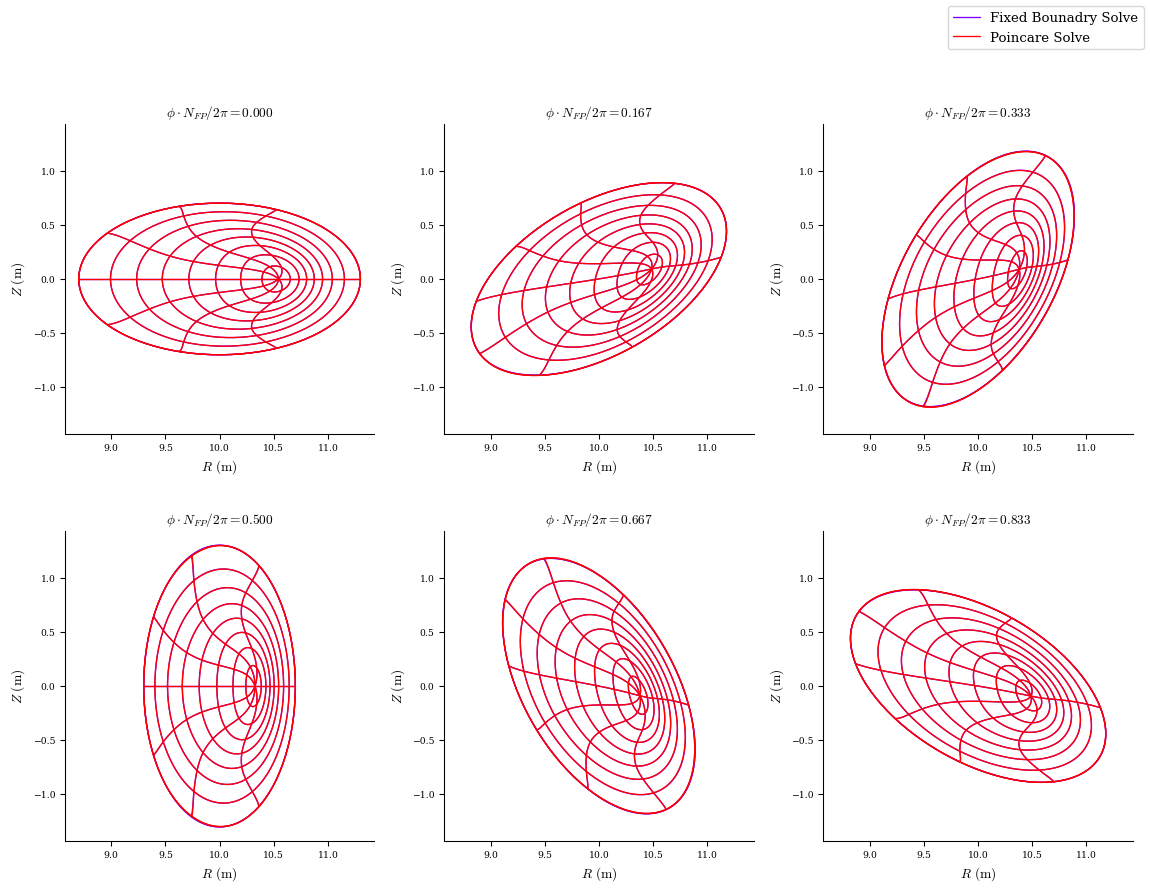

In [6]:
for n in range(1, eq.N+1):
    eq_poin.change_resolution(N=n, N_grid=2*n)
    solve_poincare(eq_poin, fix_lambda=True, maxiter=300, ftol=1e-4, gtol=0, xtol=0)
plot_comparison(eqs=[eq0, eq_poin], labels=["Fixed Bounadry Solve", "Poincare Solve"])
plt.savefig("poincare_vs_fixed_boundary_heliotron.png", dpi=600)

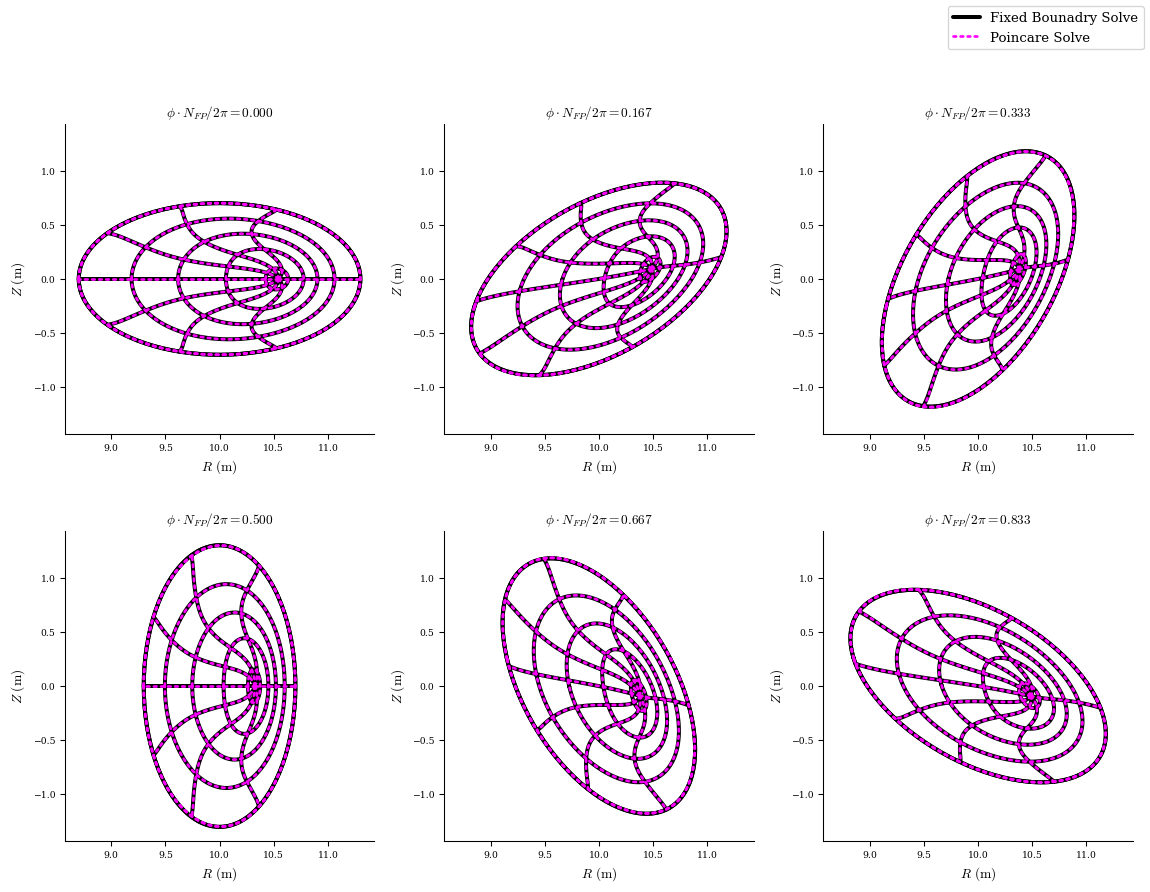

In [8]:
plot_comparison(eqs=[eq0, eq_poin], labels=["Fixed Bounadry Solve", "Poincare Solve"],rho=np.linspace(0.1, 1, 5), 
                ls=["-", ":"], 
                lw=[3,2], 
                color=["k", "magenta"]
               );
plt.savefig("poincare_vs_fixed_boundary_heliotron.png", dpi=600)

4.2945e-04


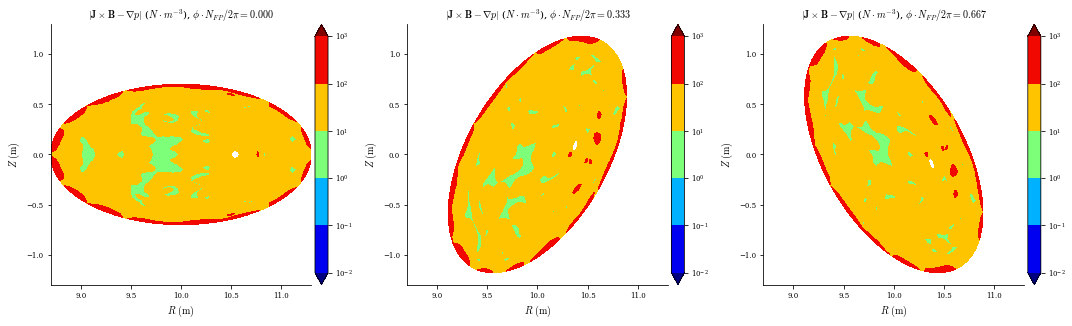

In [5]:
plot_section(eq, "|F|", phi=3, log=True);
f1 = (
    eq.compute("<|F|>_vol")["<|F|>_vol"]
    / eq.compute("<|grad(|B|^2)|/2mu0>_vol")["<|grad(|B|^2)|/2mu0>_vol"]
)
print(f"{f1:.4e}")

In [6]:
solve_fixed(eq, maxiter=400, ftol=1e-4, gtol=0, xtol=0)
plot_comparison(eqs=[eq0, eq],  
                rho=np.linspace(0.1, 1, 5), 
                ls=["-", ":"], 
                lw=[3,2], 
                color=["k", "magenta"]
               );

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 285 ms
Timer: Objective build = 627 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency boundary R
Building objective: self_consistency boundary Z
Building objective: lambda gauge
Building objective: self_consistency axis R
Building objective: self_consistency axis Z
Building objective: self_consistency section R
Building objective: self_consistency section Z
Building objective: self_consistency section Lambda
Timer: Objective build = 1.03 sec
Timer: Linear constraint projection build = 6.19 sec
Number of parameters: 1593
Number of objectives: 4940
Timer: Initializing the optimization = 7.92 sec

Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality  

      79             83          1.052e-07      2.165e-10      1.881e-03      1.470e-03   
      80             84          1.050e-07      2.106e-10      1.883e-03      1.413e-03   
      81             85          1.048e-07      2.054e-10      1.884e-03      1.380e-03   
      82             86          1.046e-07      2.008e-10      1.886e-03      1.430e-03   
      83             87          1.044e-07      1.965e-10      1.887e-03      1.470e-03   
      84             88          1.042e-07      1.925e-10      1.887e-03      1.489e-03   
      85             89          1.040e-07      1.886e-10      1.888e-03      1.480e-03   
      86             90          1.038e-07      1.847e-10      1.888e-03      1.441e-03   
      87             91          1.036e-07      1.808e-10      1.888e-03      1.373e-03   
      88             92          1.034e-07      1.770e-10      1.888e-03      1.278e-03   
      89             93          1.033e-07      1.731e-10      1.887e-03      1.206e-03   

      169            173         9.543e-08      9.626e-11      1.712e-03      1.001e-03   
      170            174         9.533e-08      9.377e-11      1.714e-03      8.833e-04   
      171            175         9.524e-08      9.196e-11      1.718e-03      8.333e-04   
      172            176         9.515e-08      9.097e-11      1.722e-03      8.509e-04   
      173            177         9.506e-08      9.077e-11      1.728e-03      9.312e-04   
      174            178         9.497e-08      9.117e-11      1.734e-03      1.081e-03   
      175            179         9.488e-08      9.189e-11      1.742e-03      1.315e-03   
      176            180         9.478e-08      9.255e-11      1.750e-03      1.560e-03   
      177            181         9.469e-08      9.278e-11      1.759e-03      1.725e-03   
      178            182         9.460e-08      9.227e-11      1.768e-03      1.775e-03   
      179            183         9.451e-08      9.083e-11      1.777e-03      1.701e-03   

      259            263         9.067e-08      1.830e-11      8.284e-04      2.673e-04   
      260            264         9.065e-08      1.819e-11      8.285e-04      2.657e-04   
      261            265         9.063e-08      1.809e-11      8.286e-04      2.642e-04   
      262            266         9.062e-08      1.798e-11      8.288e-04      2.630e-04   
      263            267         9.060e-08      1.788e-11      8.290e-04      2.618e-04   
      264            268         9.058e-08      1.778e-11      8.292e-04      2.607e-04   
      265            269         9.056e-08      1.768e-11      8.294e-04      2.597e-04   
      266            270         9.054e-08      1.758e-11      8.297e-04      2.587e-04   
      267            271         9.053e-08      1.748e-11      8.299e-04      2.577e-04   
      268            272         9.051e-08      1.739e-11      8.302e-04      2.567e-04   
      269            273         9.049e-08      1.729e-11      8.304e-04      2.557e-04   

      349            353         8.930e-08      1.337e-11      8.480e-04      2.378e-04   
      350            354         8.928e-08      1.330e-11      8.485e-04      2.372e-04   
      351            355         8.927e-08      1.323e-11      8.490e-04      2.362e-04   
      352            356         8.926e-08      1.316e-11      8.495e-04      2.349e-04   
      353            357         8.924e-08      1.309e-11      8.501e-04      2.332e-04   
      354            358         8.923e-08      1.302e-11      8.506e-04      2.311e-04   
      355            359         8.922e-08      1.295e-11      8.512e-04      2.288e-04   
      356            360         8.921e-08      1.288e-11      8.518e-04      2.263e-04   
      357            361         8.919e-08      1.281e-11      8.524e-04      2.236e-04   
      358            362         8.918e-08      1.273e-11      8.530e-04      2.207e-04   
      359            363         8.917e-08      1.266e-11      8.537e-04      2.177e-04   

NameError: name 'n' is not defined

2.7305e-04


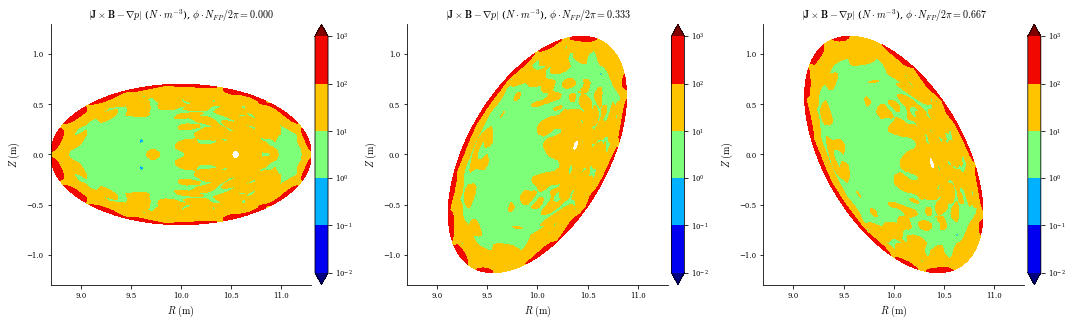

In [7]:
plot_section(eq, "|F|", phi=3, log=True);
plt.savefig("heliotron_fixed_force_error.png", dpi=500)
f1 = (
    eq.compute("<|F|>_vol")["<|F|>_vol"]
    / eq.compute("<|grad(|B|^2)|/2mu0>_vol")["<|grad(|B|^2)|/2mu0>_vol"]
)
print(f"{f1:.4e}")

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 88.9 ms
Timer: Objective build = 150 ms
Building objective: poincare R
Building objective: poincare Z
Building objective: fixed Psi
Building objective: poincare Lambda
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency boundary R
Building objective: self_consistency boundary Z
Building objective: lambda gauge
Building objective: self_consistency axis R
Building objective: self_consistency axis Z
Building objective: self_consistency section R
Building objective: self_consistency section Z
Building objective: self_consistency section Lambda
Timer: Objective build = 491 ms
Timer: Linear constraint projection build = 4.54 sec
Number of parameters: 1521
Number of objectives: 4940
Timer: Initializing the optimization = 5.24 sec

Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      C

      78             105         1.903e-08      2.067e-11      3.298e-04      5.402e-04   
      79             106         1.901e-08      1.673e-11      6.575e-04      1.575e-03   
      80             107         1.898e-08      2.591e-11      6.558e-04      1.571e-03   
      81             109         1.896e-08      2.023e-11      3.270e-04      7.076e-04   
      82             110         1.895e-08      1.578e-11      6.527e-04      1.919e-03   
      83             111         1.892e-08      2.457e-11      6.500e-04      1.950e-03   
      84             112         1.890e-08      2.415e-11      6.478e-04      2.051e-03   
      85             113         1.888e-08      2.373e-11      6.450e-04      2.285e-03   
      86             114         1.885e-08      2.400e-11      6.428e-04      2.322e-03   
      87             115         1.883e-08      2.363e-11      6.401e-04      2.517e-03   
      88             116         1.880e-08      2.380e-11      6.379e-04      2.502e-03   

      168            216         1.761e-08      1.016e-11      5.659e-04      3.926e-03   
      169            217         1.760e-08      1.000e-11      5.660e-04      4.313e-03   
      170            218         1.759e-08      1.006e-11      5.663e-04      4.657e-03   
      171            219         1.758e-08      1.038e-11      5.668e-04      4.938e-03   
      172            220         1.757e-08      1.103e-11      5.676e-04      5.134e-03   
      173            221         1.756e-08      1.196e-11      5.686e-04      5.237e-03   
      174            222         1.754e-08      1.314e-11      5.698e-04      5.237e-03   
      175            223         1.753e-08      1.439e-11      5.712e-04      5.139e-03   
      176            224         1.751e-08      1.556e-11      5.728e-04      4.956e-03   
      177            225         1.750e-08      1.639e-11      5.746e-04      4.717e-03   
      178            226         1.748e-08      1.667e-11      5.769e-04      4.468e-03   

         Current function value: 1.705e-08
         Total delta_x: 1.110e-01
         Iterations: 256
         Function evaluations: 312
         Jacobian evaluations: 257
Timer: Solution time = 1.02 min
Timer: Avg time per step = 238 ms
                                                                 Start  -->   End
Total (sum of squares):                                      8.912e-08  -->   1.705e-08, 
Maximum absolute Force error:                                5.622e+03  -->   1.206e+03 (N)
Minimum absolute Force error:                                1.096e-02  -->   1.048e-03 (N)
Average absolute Force error:                                6.353e+01  -->   3.151e+01 (N)
Maximum absolute Force error:                                4.521e-04  -->   9.700e-05 (normalized)
Minimum absolute Force error:                                8.813e-10  -->   8.431e-11 (normalized)
Average absolute Force error:                                5.110e-06  -->   2.534e-06 (normalized)
R cross-sec

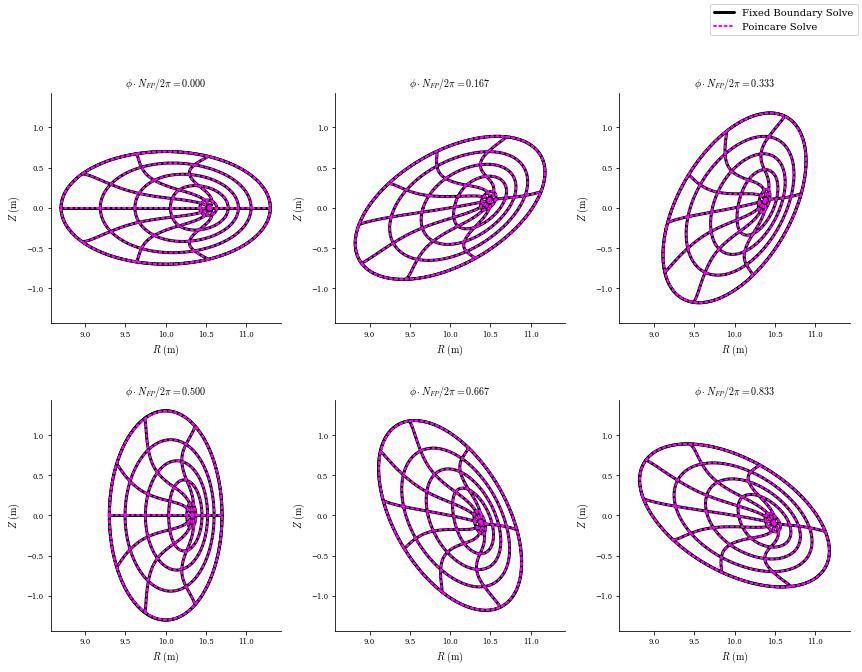

In [8]:
solve_poincare(eq, maxiter=400, ftol=1e-4, gtol=0, xtol=0)
plot_comparison(eqs=[eq0, eq], 
                labels=["Fixed Boundary Solve", f"Poincare Solve"], 
                rho=np.linspace(0.1, 1, 5), 
                ls=["-", ":"], 
                lw=[3,2], 
                color=["k", "magenta"]
               );
plt.savefig("heliotron_poincare_boundary.png", dpi=500)

1.3002e-04


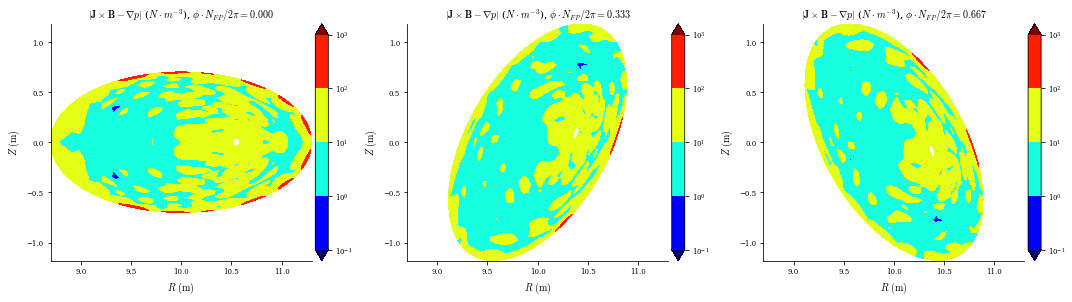

In [9]:
plot_section(eq, "|F|", phi=3, log=True);
plt.savefig("heliotron_poincare_force_error.png", dpi=500)
f1 = (
    eq.compute("<|F|>_vol")["<|F|>_vol"]
    / eq.compute("<|grad(|B|^2)|/2mu0>_vol")["<|grad(|B|^2)|/2mu0>_vol"]
)
print(f"{f1:.4e}")

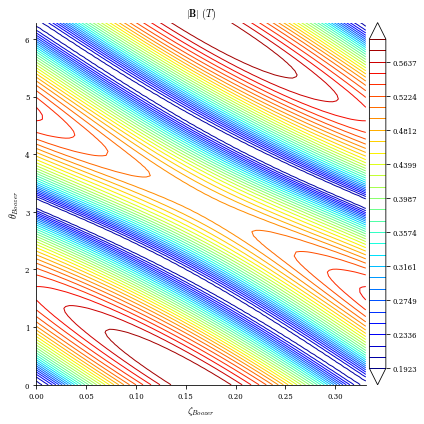

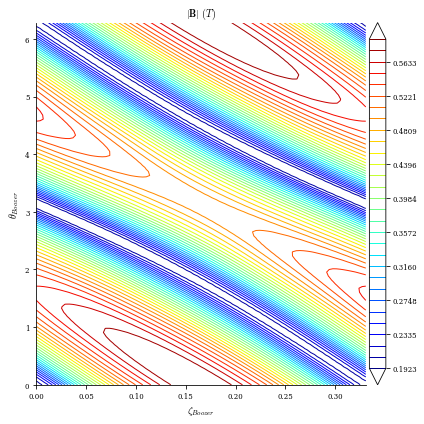

In [10]:
plot_boozer_surface(eq0)
plot_boozer_surface(eq);

In [ ]:
f1 = (
    eq.compute("<|F|>_vol")["<|F|>_vol"]
    / eq.compute("<|grad(|B|^2)|/2mu0>_vol")["<|grad(|B|^2)|/2mu0>_vol"]
)
f2 = (
    eq_poin.compute("<|F|>_vol")["<|F|>_vol"]
    / eq_poin.compute("<|grad(|B|^2)|/2mu0>_vol")["<|grad(|B|^2)|/2mu0>_vol"]
)
print(f"Force error after eq.solve(): {f1:.4e}")
print(f"Force error after eq_poin.solve: {f2:.4e}")
print(eq_poin.compute("<|F|>_vol")["<|F|>_vol"])
print(eq.compute("<|F|>_vol")["<|F|>_vol"])

In [ ]:
solve_fixed(eq, ftol=1e-4, maxiter=200)
plot_comparison(eqs=[eq0, eq], labels=["Fixed Boundary Solve", f"Poincare Solve no ;ambda"], rho=np.linspace(0.1, 1, 5), ls=["-", ":"], lw=[3,2], color=["k", "magenta"]);

In [12]:
eq_island = desc.io.load("../SurfaceIntegral/isl_curr_dens_output.h5")
eq_poin = eq_island.copy()
solve_poincare(eq_poin, maxiter=300, ftol=1e-4)

/home/ye2698/DESC/desc/io/hdf5_io.py:127: RuntimeWarning: 
The object attribute '_rho' was not loaded from the file.
This is likely because the file containing 'FourierRZToroidalSurface' was created before '_rho' became an attribute of objects of class '<class 'desc.geometry.surface.FourierRZToroidalSurface'>'.
The user may verify that a default value has been set.
This warning will persist until the file is saved with the new object.

Note to developers: Add 'def _set_up(self)' as a method to class '<class 'desc.geometry.surface.FourierRZToroidalSurface'>'
(or the superclass where this new attribute is assigned) that assigns a value to '_rho'.
This method is called automatically when a file is loaded.
Recall that the testing suite will fail on warnings.
  warnings.warn(
/home/ye2698/DESC/desc/io/hdf5_io.py:127: RuntimeWarning: 
The object attribute '_shift' was not loaded from the file.
This is likely because the file containing 'FourierRZCurve' was created before '_shift' became an a

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 3.34 sec
Timer: Objective build = 3.93 sec
Building objective: poincare R
Building objective: poincare Z
Building objective: fixed Psi
Building objective: poincare Lambda
Building objective: fixed pressure
Building objective: fixed current
Building objective: fixed sheet current
Building objective: self_consistency boundary R
Building objective: self_consistency boundary Z
Building objective: lambda gauge
Building objective: self_consistency axis R
Building objective: self_consistency axis Z
Building objective: self_consistency section R
Building objective: self_consistency section Z
Building objective: self_consistency section Lambda
Timer: Objective build = 1.90 sec
Timer: Linear constraint projection build = 16.0 sec
Number of parameters: 7344
Number of objectives: 25650
Timer: Initializing the optimization = 22.0 sec

Starting optimization
Using method: lsq-exact


2024-09-05 14:47:41.556845: W external/xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 54.79GiB (58835521919 bytes) by rematerialization; only reduced to 55.36GiB (59439752094 bytes), down from 57.47GiB (61712203914 bytes) originally
2024-09-05 14:47:53.636383: W external/xla/xla/tsl/framework/bfc_allocator.cc:482] Allocator (GPU_0_bfc) ran out of memory trying to allocate 60.94GiB (rounded to 65434581760)requested by op 
2024-09-05 14:47:53.636525: W external/xla/xla/tsl/framework/bfc_allocator.cc:494] ******______________________________________________________________________________________________
E0905 14:47:53.636551 2058310 pjrt_stream_executor_client.cc:3067] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 65434581568 bytes.


XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 65434581568 bytes.